# Data Processing - Explained
This note book will explain the data processing steps that will be used to generate the spectrogram images from the audio files. See the `AudioUtil` class for the implementation details. The notebook was created with the help of [this article](https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5).

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd

from AudioUtil import AudioUtil as au

In [2]:
# Load the audio file
path = "./input/birdsong-recognition/train_audio/vesspa/XC17095.mp3"

In [3]:
df = pd.read_csv("./input/birdsong-recognition/train.csv")

df[df["filename"] == "XC17095.mp3"]["sci_name"]

19003    Pooecetes gramineus
Name: sci_name, dtype: object

In [4]:
audio = au.open(path)

audio[0].shape, audio[1]

(torch.Size([1, 882005]), 44100)

In [5]:
audio = au.rechannel(audio, 1)

audio[0].shape, audio[1]

(torch.Size([1, 882005]), 44100)

In [6]:
audio = au.resample(audio, 44100)

ipd.display(ipd.Audio(data=audio[0], rate=audio[1]))
audio[0].shape, audio[1]

(torch.Size([1, 882005]), 44100)

In [7]:
audio = au.pad_trunc(audio, 15000)
ipd.display(ipd.Audio(data=audio[0], rate=audio[1]))

In [8]:
spectrogram = au.spectro_gram(audio)

spectrogram.shape

torch.Size([1, 64, 1290])

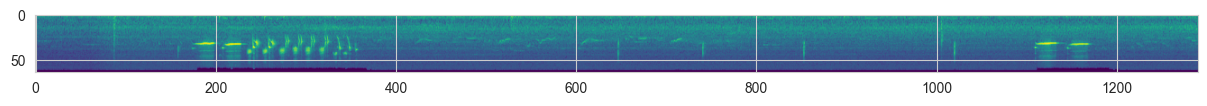

In [9]:
# plot the spectrogram
plt.figure(figsize=(15, 10))
plt.imshow(spectrogram[0], cmap='viridis')
plt.show()

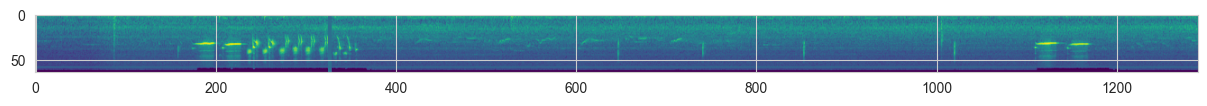

In [10]:
aug_spec = au.spectro_augment(spectrogram, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1)

plt.figure(figsize=(15, 10))
plt.imshow(aug_spec[0], cmap='viridis')
plt.show()